In [ ]:
import numpy as np
import cv2
import os
import pickle
import random
from tensorflow.keras.layers import Input, Conv2D, BatchNormalization, Dropout, Flatten, Dense, MaxPool2D
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.initializers import glorot_uniform
from tensorflow.keras.optimizers import Adam, SGD
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report
import seaborn as sns
from tensorflow.keras.regularizers import l2
import tensorflow as tf
import keras
import pandas as pd

In [ ]:
pick_in = open('../Pickle Data/cnn_train_data.pickle', 'rb')
data = pickle.load(pick_in)
pick_in.close()
print(len(data))

7390


In [ ]:
pick_in = open('../Pickle Data/cnn_test_data.pickle', 'rb')
test_data = pickle.load(pick_in)
pick_in.close()
print(len(test_data))

1378


In [ ]:
features = []
labels = []

for feature, label in data:
  features.append(feature)
  labels.append(label)

xtrain = np.array(features)
ytrain = np.array(labels)

xtrain = xtrain/255.0
print(xtrain.shape)

(7390, 128, 128)


In [ ]:
test_features = []
test_labels = []

for feature, label in test_data:
  test_features.append(feature)
  test_labels.append(label)

xtest = np.array(test_features)
ytest = np.array(test_labels)

xtest = xtest/255.0
print(xtest.shape)

(1378, 128, 128)


In [ ]:
label_encoder = LabelEncoder()
ytrain = label_encoder.fit_transform(ytrain)
print(ytrain.shape)

label_encoder = LabelEncoder()
ytest = label_encoder.fit_transform(ytest)
print(ytest.shape)

(7390,)
(1378,)


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


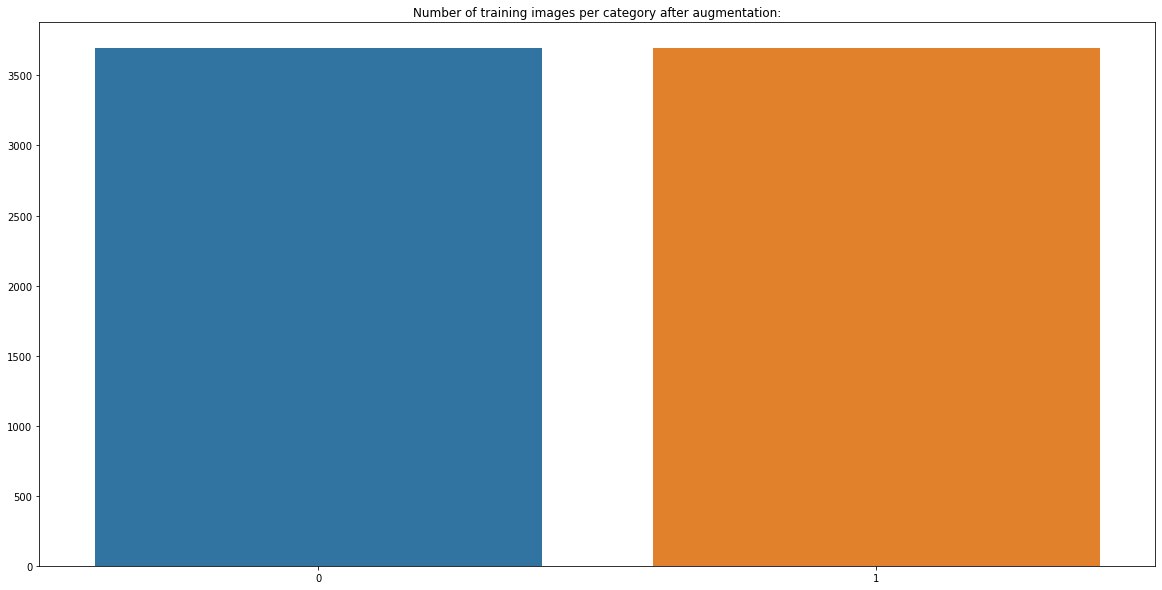

In [ ]:
unique_train, count = np.unique(ytrain, return_counts=True)
plt.figure(figsize=(20, 10))
sns.barplot(unique_train, count).set_title("Number of training images per category after augmentation:")
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


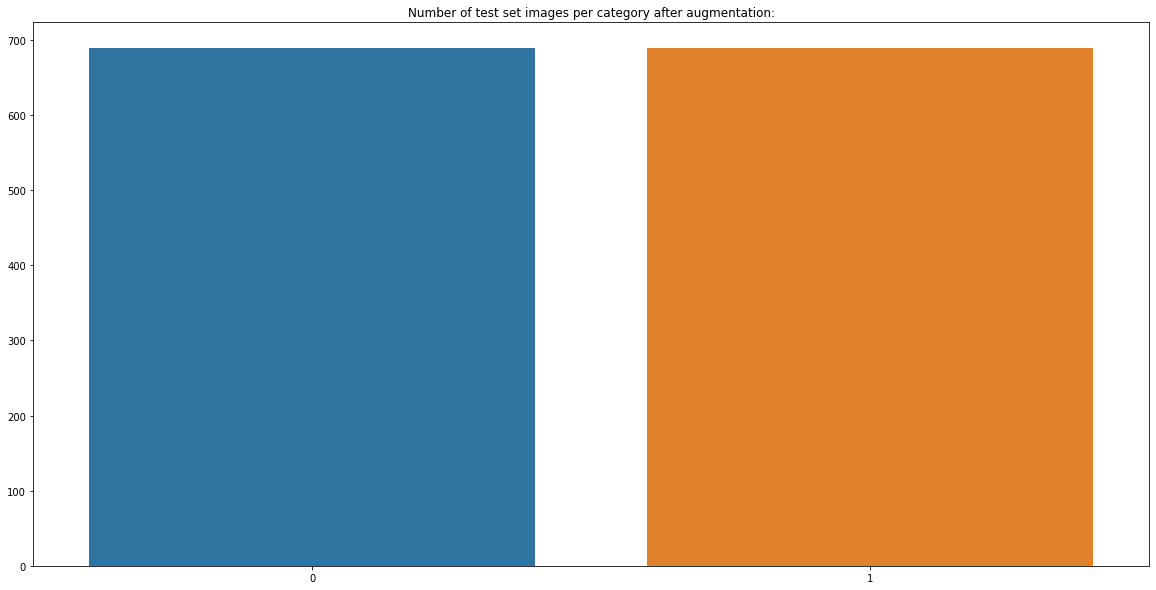

In [ ]:
unique_test, count_test = np.unique(ytest, return_counts=True)
plt.figure(figsize=(20, 10))
sns.barplot(unique_test, count_test).set_title("Number of test set images per category after augmentation:")
plt.show()

In [ ]:
ytrain = to_categorical(ytrain)
ytest = to_categorical(ytest)

xtrain = np.expand_dims(xtrain, axis=-1)
xtest = np.expand_dims(xtest, axis=-1)

print(xtrain.shape)
print(ytrain.shape)
print(xtest.shape)
print(ytest.shape)

(7390, 128, 128, 1)
(7390, 2)
(1378, 128, 128, 1)
(1378, 2)


In [ ]:
input_shape=(128, 128, 1)
regularizer = tf.keras.regularizers.l2(0.001)

model = Sequential()

model.add(Input(shape=input_shape))

model.add(Conv2D(128, (5, 5), padding='same', strides=(1, 1), name='conv1', activation='relu', kernel_initializer='glorot_uniform', kernel_regularizer=regularizer))
model.add(MaxPool2D((9, 9), strides=(3, 3)))

model.add(Conv2D(64, (5, 5), padding='same', strides=(1, 1), name='conv2', activation='relu', kernel_initializer='glorot_uniform', kernel_regularizer=regularizer))
model.add(MaxPool2D((7, 7), strides=(3, 3)))
    
model.add(Conv2D(32, (3, 3), padding='same', strides=(1, 1), name='conv3', activation='relu', kernel_initializer='glorot_uniform', kernel_regularizer=regularizer))
model.add(MaxPool2D((5, 5), strides=(2, 2)))

model.add(Conv2D(32, (3, 3), padding='same', strides=(1, 1), name='conv4', activation='relu', kernel_initializer='glorot_uniform', kernel_regularizer=regularizer))
model.add(MaxPool2D((3, 3), strides=(2, 2)))    
    
model.add(Flatten())
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu', kernel_initializer='glorot_uniform', name='fc1'))
model.add(Dropout(0.5))
model.add(Dense(2, activation='softmax', kernel_initializer='glorot_uniform', name='fc3'))

optimizer = Adam(3.15e-5)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1 (Conv2D)              (None, 128, 128, 128)     3328      
                                                                 
 max_pooling2d_16 (MaxPoolin  (None, 40, 40, 128)      0         
 g2D)                                                            
                                                                 
 conv2 (Conv2D)              (None, 40, 40, 64)        204864    
                                                                 
 max_pooling2d_17 (MaxPoolin  (None, 12, 12, 64)       0         
 g2D)                                                            
                                                                 
 conv3 (Conv2D)              (None, 12, 12, 32)        18464     
                                                                 
 max_pooling2d_18 (MaxPoolin  (None, 4, 4, 32)        

In [ ]:
model_history = model.fit(xtrain, ytrain, batch_size=128, epochs=100, validation_data=(xtest, ytest))

Epoch 1/100
58/58 [==============================] - 17s 288ms/step - loss: 0.8324 - accuracy: 0.4996 - val_loss: 0.8273 - val_accuracy: 0.5007
Epoch 2/100
58/58 [==============================] - 17s 287ms/step - loss: 0.8230 - accuracy: 0.5175 - val_loss: 0.8192 - val_accuracy: 0.5000
Epoch 3/100
58/58 [==============================] - 17s 287ms/step - loss: 0.8151 - accuracy: 0.5252 - val_loss: 0.8116 - val_accuracy: 0.5000
Epoch 4/100
58/58 [==============================] - 17s 288ms/step - loss: 0.8084 - accuracy: 0.5217 - val_loss: 0.8048 - val_accuracy: 0.6147
Epoch 5/100
58/58 [==============================] - 17s 288ms/step - loss: 0.8012 - accuracy: 0.5336 - val_loss: 0.7982 - val_accuracy: 0.6081
Epoch 6/100
58/58 [==============================] - 17s 289ms/step - loss: 0.7955 - accuracy: 0.5361 - val_loss: 0.7929 - val_accuracy: 0.5232
Epoch 7/100
58/58 [==============================] - 17s 289ms/step - loss: 0.7891 - accuracy: 0.5424 - val_loss: 0.7872 - val_accuracy:

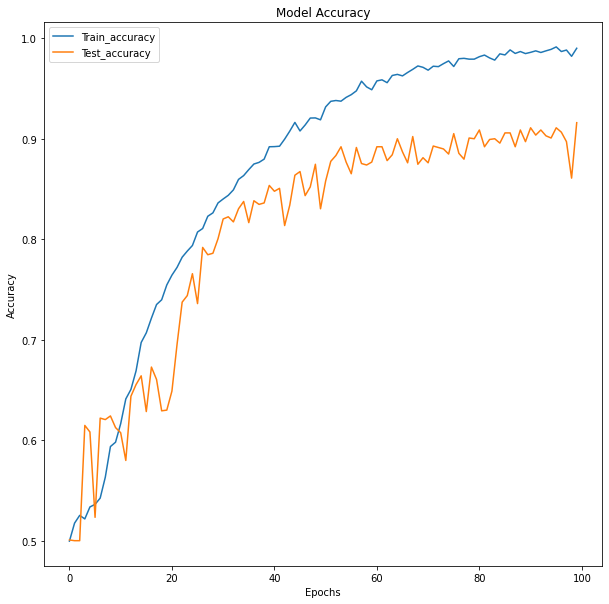

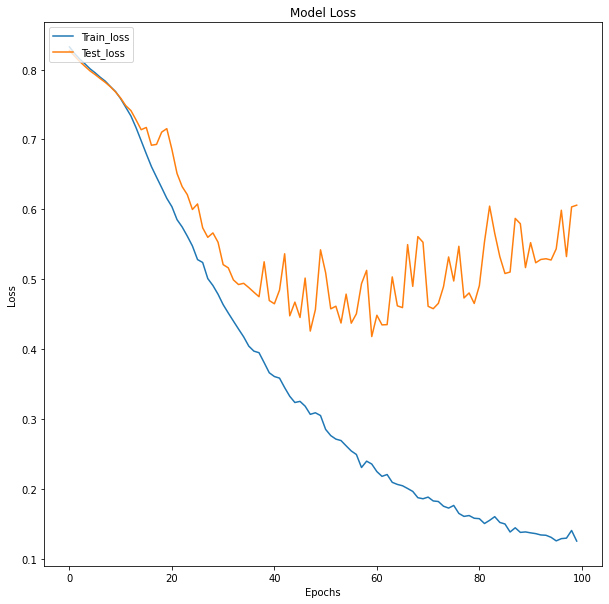

In [ ]:
figure = plt.figure(figsize=(10, 10))
plt.plot(model_history.history['accuracy'], label='Train_accuracy')
plt.plot(model_history.history['val_accuracy'], label='Test_accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc="upper left")
plt.show()

figure2 = plt.figure(figsize=(10, 10))
plt.plot(model_history.history['loss'], label='Train_loss')
plt.plot(model_history.history['val_loss'], label='Test_loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(loc="upper left")
plt.show()

In [86]:
user_dir = '/content/drive/MyDrive/Testing/'

categories = ['healthy', 'parkinson']

user_data = []

for category in categories:
  path = os.path.join(user_dir, category)
  label = categories.index(category)
  for image in os.listdir(path):
    image_path = os.path.join(path, image)
    image = cv2.imread(image_path)
    image = cv2.resize(image, (128, 128))
    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    image_arr = np.array(image)
    user_data.append([image_arr, label])

len(user_data)

30

In [89]:
random.shuffle(user_data)
user_features = []
user_labels = []

for user_feature, user_label in user_data:
  user_features.append(user_feature)
  user_labels.append(user_label)

user_features = np.array(user_features)
user_labels = np.array(user_labels)

user_features = user_features/255.0

label_encoder = LabelEncoder()
user_labels = label_encoder.fit_transform(user_labels)

user_labels = to_categorical(user_labels)

user_features = np.expand_dims(user_features, axis=-1)

print(user_features.shape)
print(user_labels.shape)

(30, 128, 128, 1)
(30, 2)


In [91]:
acc = model.evaluate(user_features, user_labels)

1/1 [==============================] - 0s 60ms/step - loss: 0.7978 - accuracy: 0.8333
